# Interpolación segmentaria


In [1]:
x = [ 3    4.5  7   9  ];
y = [ 2.5  1    2.5 0.5];


In [12]:
graphics_toolkit ("gnuplot")

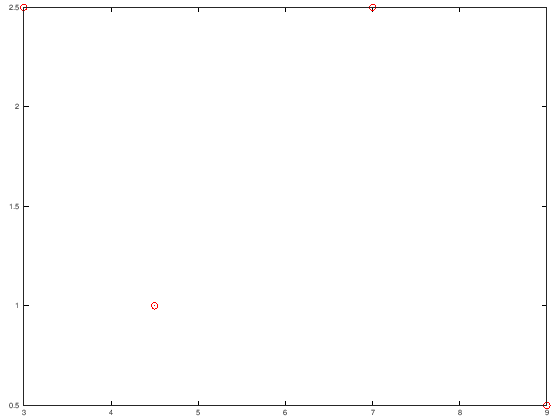

In [13]:
plot (x, y, 'or')

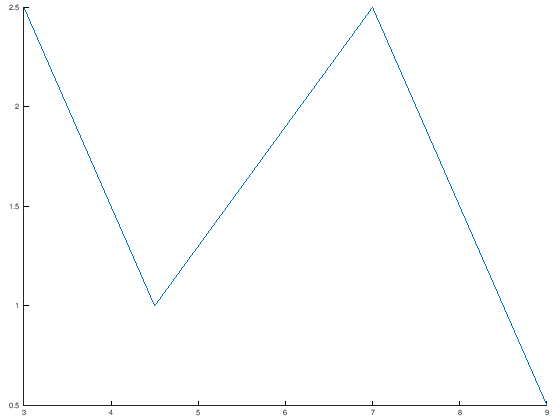

In [14]:
hold on;
plot (x,y)

## Segmentación lineal

In [15]:
function xr = f1(x)
    m0 = (1 - 2.5) / (4.5 - 3);
    xr = 2.5 + m0 * ( x - 3);
end

In [16]:
x = [ 3    4.5  7   9  ];
y = [ 2.5  1    2.5 0.5];



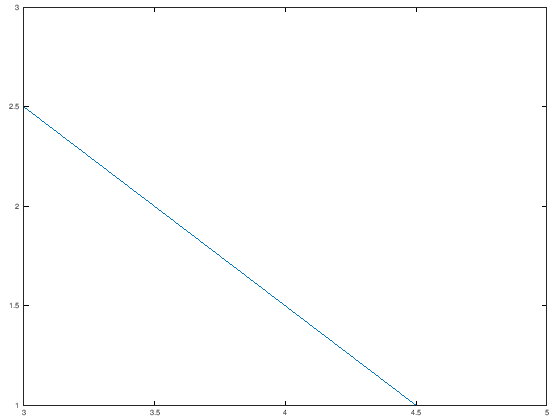

In [17]:
x1 = linspace(3,4.5);
y1 = f1(x1);
plot (x1, y1)

In [18]:
function xr = f1(x,x1,y1,x2,y2)
    m0 = (y2 - y1) / (x2 - x1);
    xr = y1 + m0 * ( x - x1);
end

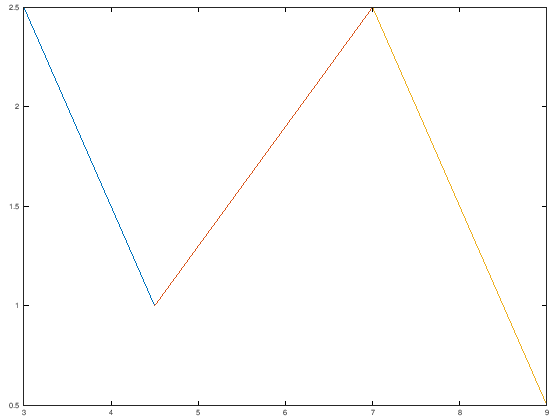

In [19]:
x = [ 3    4.5  7   9  ];
y = [ 2.5  1    2.5 0.5];

x1 = linspace(3,4.5);
y1 = f1(x1,3,2.5,4.5,1);

x2 = linspace(4.5,7);
y2 = f1(x2,4.5,1,7,2.5);

x3 = linspace(7,9);
y3 = f1(x3,7,2.5,9,0.5);

plot (x1,y1)
hold on
plot (x2,y2)
plot (x3,y3)


## Segmentación cuadratica

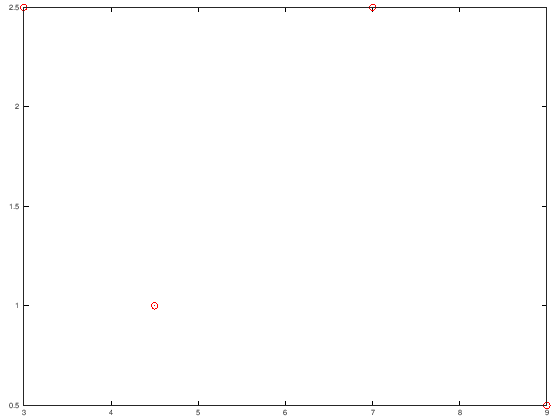

In [20]:
x = [ 3    4.5  7   9  ];
y = [ 2.5  1    2.5 0.5];
plot (x, y, 'or')

In [22]:
%f0 = a0 + b0(3)   + c0(9)         = 2.5
%f0 = a0 + b0(4.5) + c0(4.5 * 4.5) = 1

%f1 = a1 + b1(4.5) + c1(4.5 * 4.5) = 1
%f1 = a1 + b1(7)   + c1(7 * 7)     = 2.5

%f2 = a2 + b2(7)   + c2(7 * 7)     = 2.5
%f2 = a2 + b2(9)   + c2(9 * 9)     = 0.5

%fp0 = b0 + 2*c0(4.5) - b1 - 2*c1(4.5) = 0
%fp1 = b1 + 2*c1(7)   - b2 - 2*c2(7)   = 0

%fppn = 4 * c2 * (9) = 0

%r = [a0, b0,    c0,  a1, b1,    c1, a2, b2, c2, resultado]
r1 = [1,   3,     9,  0,   0,     0,  0,  0,  0, 2.5];
r2 = [1, 4.5, 20.25,  0,   0,     0,  0,  0,  0, 1];
r3 = [0,   0,     0,  1, 4.5, 20.25,  0,  0,  0, 1];
r4 = [0,   0,     0,  1,   7,    49,  0,  0,  0, 2.5];
r5 = [0,   0,     0,  0,   0,     0,  1,  7, 49, 2.5];
r6 = [0,   0,     0,  0,   0,     0,  1,  9, 81, 0.5];
r7 = [0,   1,     9,  0,  -1,    -9,  0,  0,  0, 0];
r8 = [0,   0,     0,  0,   1,    14,  0, -1,-14, 0];
r9 = [0,   0,     0,  0,   0,     0,  0,  0, 36, 0];


In [23]:
A = [r1; r2; r3; r4; r5; r6; r7; r8; r9];

In [24]:
A

A =

 Columns 1 through 8:

    1.0000    3.0000    9.0000         0         0         0         0         0
    1.0000    4.5000   20.2500         0         0         0         0         0
         0         0         0    1.0000    4.5000   20.2500         0         0
         0         0         0    1.0000    7.0000   49.0000         0         0
         0         0         0         0         0         0    1.0000    7.0000
         0         0         0         0         0         0    1.0000    9.0000
         0    1.0000    9.0000         0   -1.0000   -9.0000         0         0
         0         0         0         0    1.0000   14.0000         0   -1.0000
         0         0         0         0         0         0         0         0

 Columns 9 and 10:

         0    2.5000
         0    1.0000
         0    1.0000
         0    2.5000
   49.0000    2.5000
   81.0000    0.5000
         0         0
  -14.0000         0
   36.0000         0



In [25]:
rref(A)

ans =

 Columns 1 through 8:

    1.0000         0         0         0         0         0         0         0
         0    1.0000         0         0         0         0         0         0
         0         0    1.0000         0         0         0         0         0
         0         0         0    1.0000         0         0         0         0
         0         0         0         0    1.0000         0         0         0
         0         0         0         0         0    1.0000         0         0
         0         0         0         0         0         0    1.0000         0
         0         0         0         0         0         0         0    1.0000
         0         0         0         0         0         0         0         0

 Columns 9 and 10:

         0   34.3000
         0  -17.0000
         0    2.1333
         0  -21.8600
         0    7.9600
         0   -0.6400
         0    9.5000
         0   -1.0000
    1.0000         0



In [32]:
function xr = f1(x)
   xr = 34.3000 - 17.0000 .* (x) + 2.1333 .* (x.^2);
end
function xr = f2(x)
   xr = -21.8600 + 7.9600 .* (x) - 0.6400 .* (x.^2);
end 
function xr = f3(x)
   xr = 9.5000 - 1 .* (x) + (0);
end


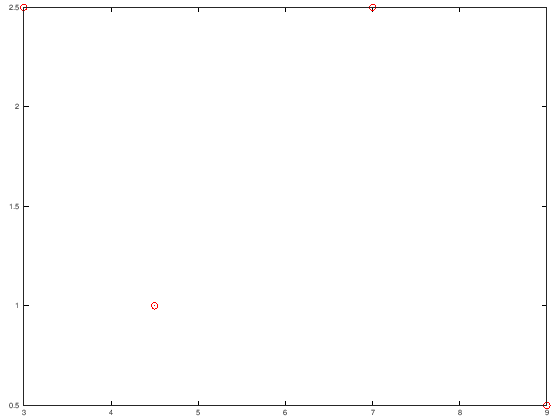

In [33]:
x = [ 3    4.5  7   9  ];
y = [ 2.5  1    2.5 0.5];
plot (x, y, 'or')

In [34]:
x1 = linspace(3,4.5);
y1 = f1(x1);

x2 = linspace(4.5, 7);
y2 = f2(x2);

x3 = linspace(7,9);
y3= f3(x3);

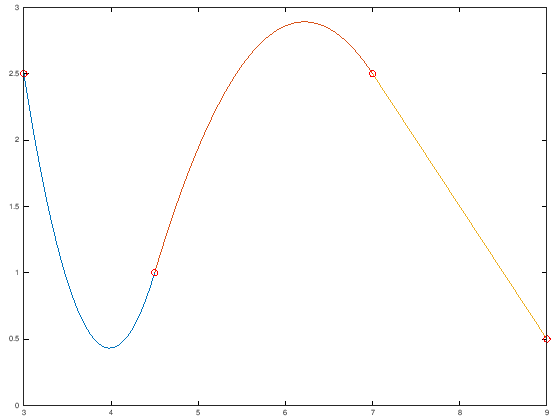

In [37]:
plot(x1, y1);
hold on
plot(x2, y2);
plot(x3, y3);
plot (x, y, 'or')

## Segmentación cúbica

$$ a_0 + b_0x + c_0x^2 + d_0x^3 = y_0 $$

In [8]:
x = [ 3.0  4.5  7.0  9.0  ];
y = [ 2.5  1.0  2.5  0.5];

%r = [ a0, b0,  c0,   d0,   a1, b1, c1,     d1,   a2, b2, c2, d2,  resultado]
r1  =[1.0 3.0  9.0  27.0   0.0 0.0  0.0    0.0   0.0 0.0  0.0    0.0 2.5];
r2  =[1.0 4.5 20.25 91.125 0.0 0.0  0.0    0.0   0.0 0.0  0.0    0.0 1.0];
r3  =[0.0 0.0  0.0   0.0   1.0 4.5 20.25  91.125 0.0 0.0  0.0    0.0 1.0];
r4  =[0.0 0.0  0.0   0.0   1.0 7.0 49.0  343.0   0.0 0.0  0.0    0.0 2.5];
r5  =[0.0 0.0  0.0   0.0   0.0 0.0  0.0    0.0   1.0 7.0 49.0  343.0 2.5];
r6  =[0.0 0.0  0.0   0.0   0.0 0.0  0.0    0.0   1.0 9.0 81.0  729.0 0.5];

$$f'_i(x) = f'_{i+1}(x) \\
b_0 + 2c_0x + 3d_0x^2 $$

In [9]:
%r = [ a0, b0, c0, d0,   a1, b1,   c1,     d1,  a2, b2,    c2,    d2,  resultado]
r7  =[0.0 1.0 9.0 60.75 0.0  -1.0 -9.0 -60.75  0.0  0.0   0.0    0.0  0.0];
r8  =[0.0 0.0 0.0  0.0  0.0   1.0 14.0  147.0  0.0 -1.0 -14.0 -147.0  0.0];

$$f''_i(x) = f''_{i+1}(x) \\
2c_0 + 6d_0x $$

In [10]:
%r = [ a0, b0, c0, d0,   a1, b1,  c1,  d1,   a2, b2,  c2,  d2,  resultado]
r9  =[0.0 0.0 2.0 27.0   0.0 0.0 -2.0 -27.0 0.0 0.0   0.0   0.0 0.0];
r10 =[0.0 0.0 0.0  0.0   0.0 0.0 14.0  42.0 0.0 0.0 -14.0 -42.0 0.0];


r11 =[0.0 0.0 2.0 18.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0];
r12 =[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 54.0 0.0];

In [11]:
A = [r1 ; r2; r3; r4; r5; r6; r7; r8; r9; r10; r11; r12];

In [13]:
rref(A)

ans =

 Columns 1 through 7:

     1.0000          0          0          0          0          0          0
          0     1.0000          0          0          0          0          0
          0          0     1.0000          0          0          0          0
          0          0          0     1.0000          0          0          0
          0          0          0          0     1.0000          0          0
          0          0          0          0          0     1.0000          0
          0          0          0          0          0          0     1.0000
          0          0          0          0          0          0          0
          0          0          0          0          0          0          0
          0          0          0          0          0          0          0
          0          0          0          0          0          0          0
          0          0          0          0          0          0          0

 Columns 8 through 13:

         

In [16]:
function xr = f1(x)
    xr = -2.4613 + 8.7305.*(x) - 3.5384.*(x.^2) + 0.3932 .* (x.^3);
end
function xr = f2(x)
    xr = 100.3181 - 59.7891.*(x) + 11.6882.*(x.^2) - 0.7347.* (x.^3);
end
function xr = f3(x)
    xr = 283.3502 - 95.4447.*(x) + 10.6695.*(x.^2) - 0.3952.* (x.^3);
end
x1 = linspace(3,4.5);
y1 = f1(x1);

x2 = linspace(4.5, 7);
y2 = f2(x2);

x3 = linspace(7,9);
y3= f3(x3);

In [17]:
x = [ 3    4.5  7   9  ];
y = [ 2.5  1    2.5 0.5];
plot (x, y, 'or')

Inline plot failed, consider trying another graphics toolkit
error: print: figure must be visible or qt toolkit must be used with __gl_window__ property 'on' or QT_OFFSCREEN feature available
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



In [18]:
graphics_toolkit ("gnuplot")

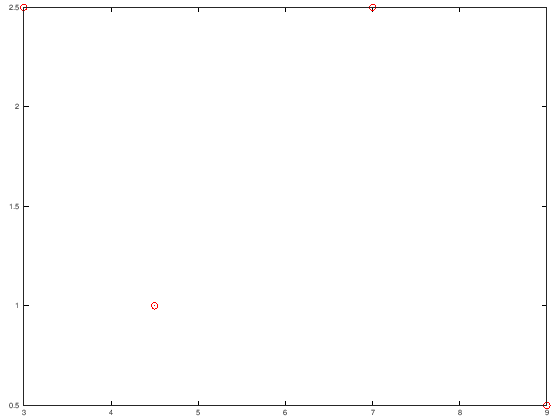

In [19]:
x = [ 3    4.5  7   9  ];
y = [ 2.5  1    2.5 0.5];
plot (x, y, 'or')

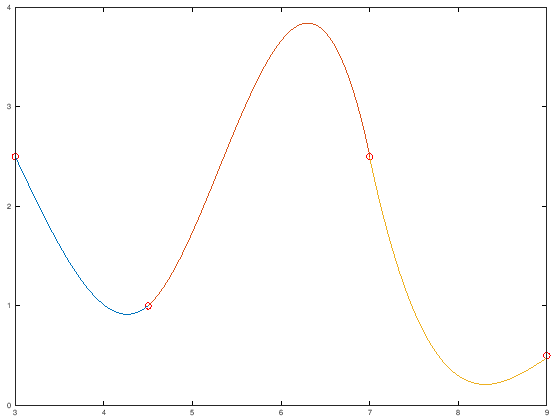

In [20]:
x = [ 3    4.5  7   9  ];
y = [ 2.5  1    2.5 0.5];
plot (x, y, 'or')
hold on
plot(x1, y1);
plot(x2, y2);
plot(x3, y3);